In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, RocCurveDisplay, accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
# Thay đổi đường dẫn file csv để có thể làm
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prediction churn of customers/Data_Nhom.csv", encoding= 'unicode_escape')


<ipython-input-3-d0f5defac0a1>:2: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prediction churn of customers/Data_Nhom.csv", encoding= 'unicode_escape')


In [21]:
df.head()

,status,KSRM,CTRM,CTK,recareNotOK,BoiHoan,DCG,CRH,CRK,BBTL,songayNKN,CLBT,TongDai,LL,LLT1,TienBT
0,1,0,0,0,0,0,0,1,1,0,10.0,0,0,535144,644097,0.0
1,1,0,1,0,0,0,1,1,0,0,158.0,0,0,0,0,0.0
2,1,0,1,0,0,0,0,1,1,0,22.0,0,1,386647,741842,0.0
3,1,0,0,0,0,0,0,1,0,0,39.0,0,0,396,75786,0.0
4,1,0,1,0,0,0,0,1,0,0,97.0,0,0,0,153616,0.0


In [5]:
df.shape

(86264, 20)

In [6]:
cols_remove = ["id","Unnamed: 17","Unnamed: 18","Unnamed: 19"]
for col in cols_remove:
  df.drop(col, axis=1, inplace=True)

In [7]:
def des_ana(dataframe):
    print("----------------------Shape--------------------------")
    print(f'{dataframe.shape}\n\n')
    print("----------------------Columns--------------------------")
    print(f'{dataframe.columns}\n\n')
    print("----------------------Info--------------------------")
    print(f'{dataframe.info()}\n\n')
    print("----------------------Descriptive--------------------------")
    print(f'{dataframe.describe()}\n\n')
    print("----------------------Null values--------------------------")
    print(f'{dataframe.isnull().sum()}\n\n')
    print("----------------------Unique values--------------------------")
    print(f'{dataframe.nunique()}\n\n')

des_ana(df)

----------------------Shape--------------------------
(86264, 16)


----------------------Columns--------------------------
Index(['status', 'KSRM', 'CTRM', 'CTK', 'recareNotOK', 'BoiHoan', 'DCG', 'CRH',
       'CRK', 'BBTL', 'songayNKN', 'CLBT', 'TongDai', 'LL', 'LLT1', 'TienBT'],
      dtype='object')


----------------------Info--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86264 entries, 0 to 86263
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   status       86264 non-null  int64  
 1   KSRM         86264 non-null  int64  
 2   CTRM         86264 non-null  int64  
 3   CTK          86264 non-null  int64  
 4   recareNotOK  86264 non-null  int64  
 5   BoiHoan      86264 non-null  int64  
 6   DCG          86264 non-null  int64  
 7   CRH          86264 non-null  int64  
 8   CRK          86264 non-null  int64  
 9   BBTL         86264 non-null  int64  
 10  songayNKN    85136 non

In [8]:
# Điền giá trị trung bình vào giá trị null 'songayNKN'
df["songayNKN"] = df["songayNKN"].fillna(df["songayNKN"].mean())

In [9]:
# Gộp [1,2,3,4] thành '0': Chưa rời mạng
# Gộp [5,6] thành '1': Đã rời mạng

df['status'][df['status']<=4]=0
df['status'][df['status']>4]=1

# df['status'] = df['status'].apply(lambda x: 0 if x in [1,2,3,4] else 1) => Dùng cách này đều được

<ipython-input-9-e7da5728bbad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][df['status']<=4]=0
<ipython-input-9-e7da5728bbad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][df['status']>4]=1


In [ ]:
test = df[["LL","LLT1"]].values
test

In [50]:
test[:,1]

array([644097,      0, 741842, ...,      0,      0,      0])

(array([8.6249e+04, 1.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.25375220e+07, 4.50750440e+07, 6.76125660e+07,
        9.01500880e+07, 1.12687610e+08, 1.35225132e+08, 1.57762654e+08,
        1.80300176e+08, 2.02837698e+08, 2.25375220e+08]),
 <BarContainer object of 10 artists>)

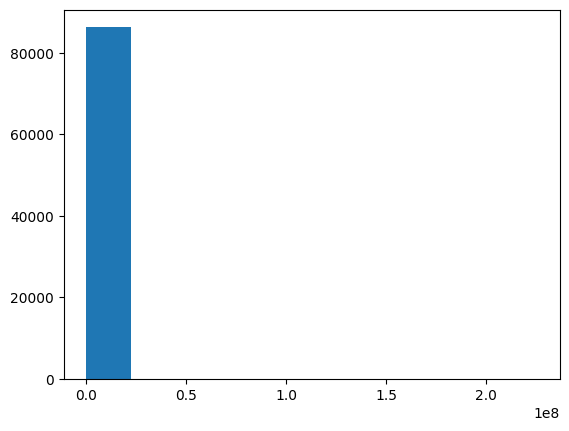

In [52]:
plt.hist(test[:,1])

In [54]:
test.shape

(86264, 2)

In [53]:
test_scale = sta_scale.fit_transform(test)

In [31]:
test_scale.shape

(86264, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ae2b8dee500>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae2b8deea40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae2b8dee260>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae2b8deeef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae2b8def190>],
 'means': []}

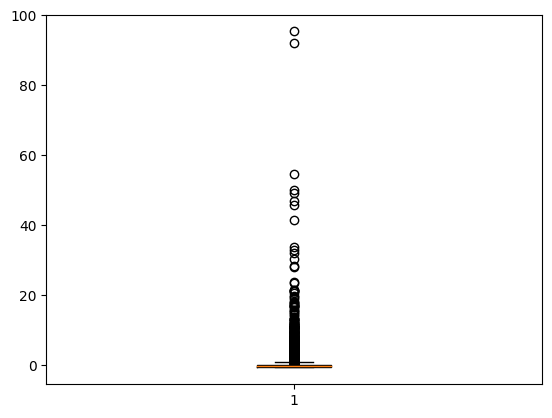

In [59]:
plt.boxplot(test_scale[:,0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ae2b8a6f790>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae2b8a6fcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae2b8a6f610>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae2b8a5bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae2b8a5b760>],
 'means': []}

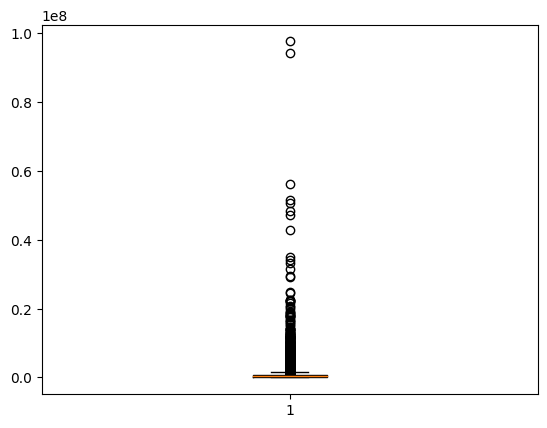

In [61]:
plt.boxplot(test[:,0])

(array([8.6249e+04, 1.2000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -0.507823  ,  19.6998774 ,  39.9075778 ,  60.1152782 ,
         80.3229786 , 100.53067901, 120.73837941, 140.94607981,
        161.15378021, 181.36148061, 201.56918101]),
 <BarContainer object of 10 artists>)

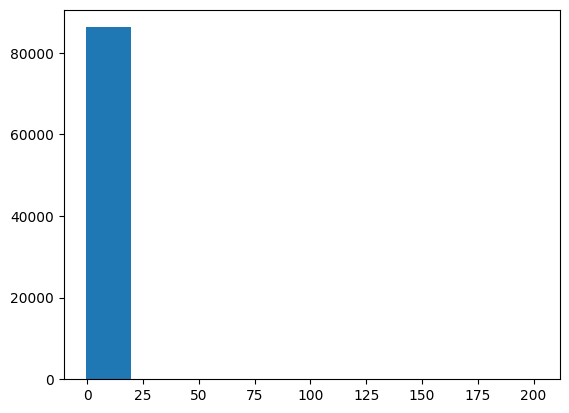

In [56]:
plt.hist(test_scale[:,1])

In [74]:
#test_log = np.log(test)
test_log = pow(test,1/3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ae2b8869180>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae2b8868c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae2b8869420>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae2b8868700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae2b8868460>],
 'means': []}

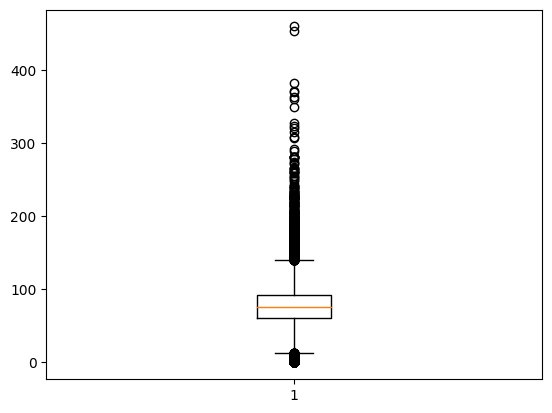

In [75]:
plt.boxplot(test_log[:,0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ae2b8be3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae2b8c48220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae2b8be3a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae2b8c48760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae2b8c48a00>],
 'means': []}

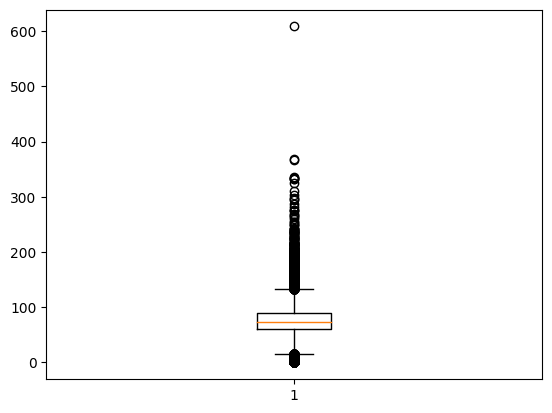

In [76]:
plt.boxplot(test_log[:,1])

(array([1.0693e+04, 5.3655e+04, 2.0654e+04, 1.0620e+03, 1.4100e+02,
        3.7000e+01, 1.2000e+01, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([  0.        ,  46.02413164,  92.04826327, 138.07239491,
        184.09652654, 230.12065818, 276.14478981, 322.16892145,
        368.19305309, 414.21718472, 460.24131636]),
 <BarContainer object of 10 artists>)

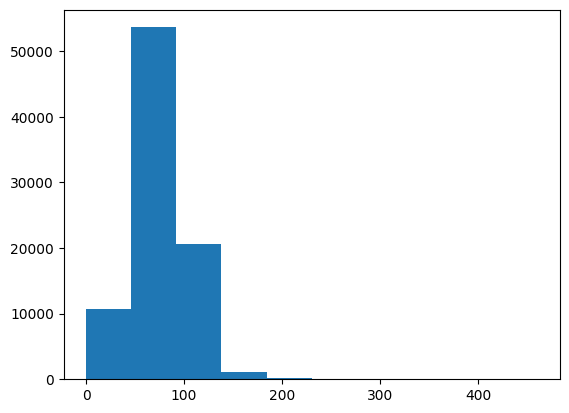

In [78]:
plt.hist(test_log[:,0])

In [10]:
print(df['status'])

0        1
1        1
2        1
3        1
4        1
        ..
86259    0
86260    0
86261    0
86262    0
86263    0
Name: status, Length: 86264, dtype: int64


In [11]:
cat_cols = ['status',
        'KSRM',
        'CTRM',
        'CTK',
        'recareNotOK',
        'BoiHoan',
        'DCG',
        'CRH',
        'CRK',
        'BBTL',
        'CLBT',
        'TongDai']

for cat_col in cat_cols:
  df[cat_col] = df[cat_col].astype('category')

# Visualizing data

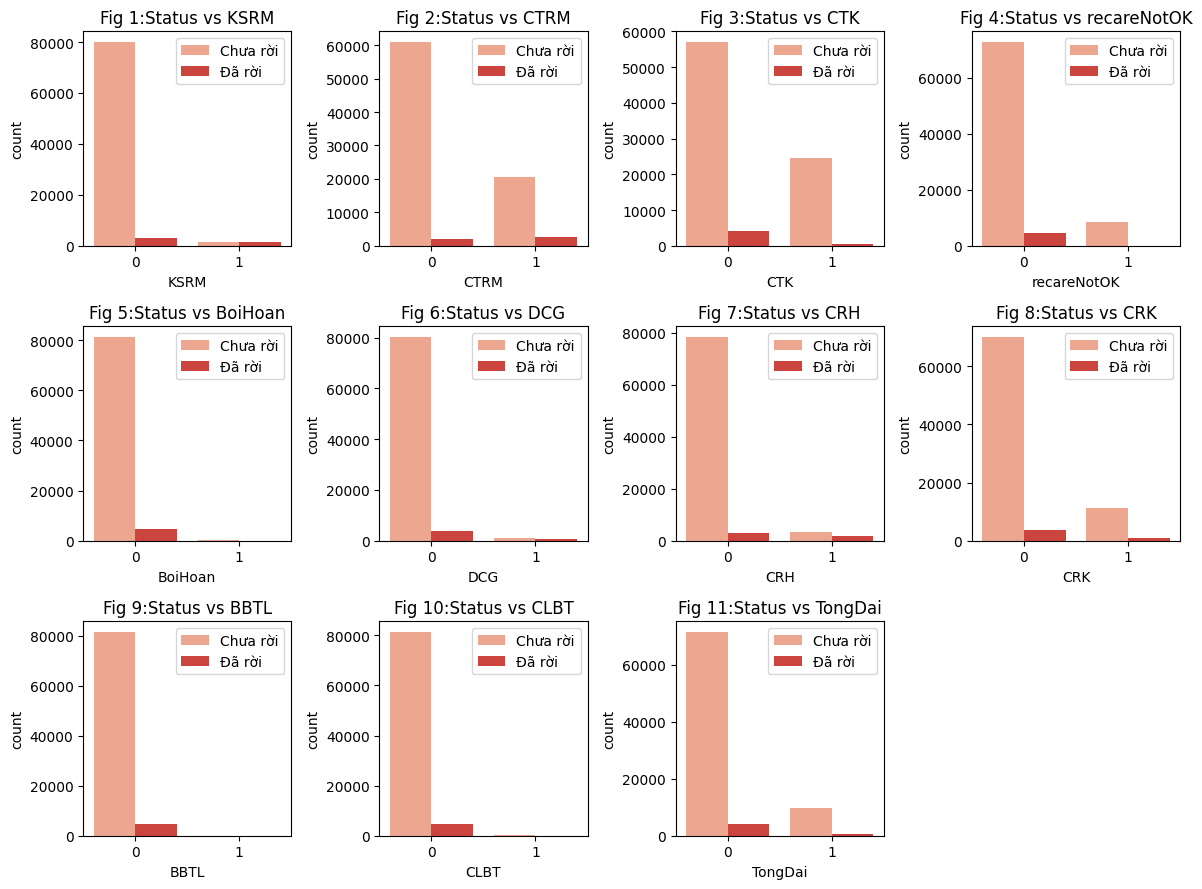

In [12]:
# Trực quang so sánh cột "status" với những cột có dạng 'categorical' còn lại.
# => Để biết được tỉ lệ rời mạng hay chưa trong các cột.
vis_cols_cat = ['KSRM',
                'CTRM',
                'CTK',
                'recareNotOK',
                'BoiHoan',
                'DCG',
                'CRH',
                'CRK',
                'BBTL',
                'CLBT',
                'TongDai']

n_rows = 3
n_cols = 4
size = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*size, n_rows*size)) # tạo ra từng plot con

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # chạy qua từng plot
        if i < len(vis_cols_cat):
            ax_i = ax[r,c]
            sns.countplot(data=df, x=vis_cols_cat[i], hue="status", palette="Reds", ax=ax_i)
            ax_i.set_title(f"Fig {i+1}:Status vs {vis_cols_cat[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Chưa rời','Đã rời'])
ax.flat[-1].set_visible(False) # Xóa plot cuối vì bị dư
plt.tight_layout()

In [13]:
vis_cols_cat

['KSRM',
 'CTRM',
 'CTK',
 'recareNotOK',
 'BoiHoan',
 'DCG',
 'CRH',
 'CRK',
 'BBTL',
 'CLBT',
 'TongDai']

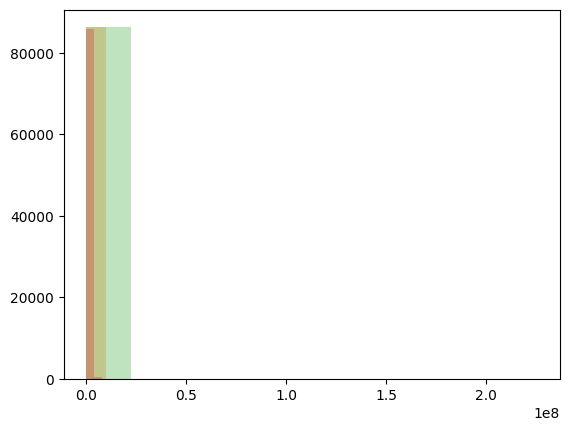

In [14]:
vis_cols_num = [
    "songayNKN",
    "LL",
    "LLT1",
    "TienBT"
]
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)

for column in vis_cols_num:
    plt.hist(df[column], **kwargs);

<Axes: xlabel='songayNKN', ylabel='Count'>

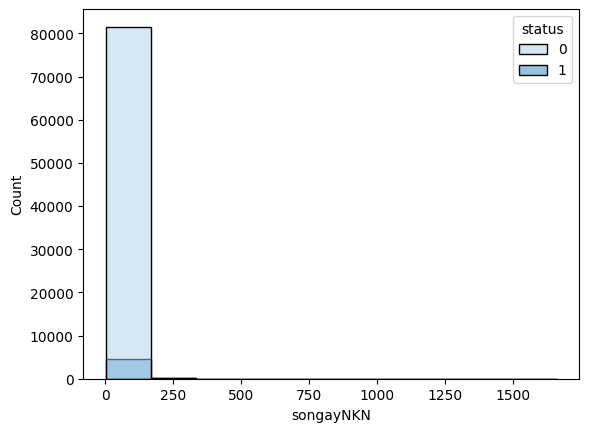

In [15]:
sns.histplot(data=df, x="songayNKN", hue='status', bins=10, palette='Blues')

In [16]:
# Kiểm tra dữ có cân bằng không
df['status'].value_counts()

0    81658
1     4606
Name: status, dtype: int64

In [17]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [18]:
X[:,9]

array([ 10.        , 158.        ,  22.        , ...,   5.49600639,
         5.49600639,   5.49600639])

In [19]:
ros = RandomOverSampler()
X,y = ros.fit_resample(X,y)

In [20]:
# Chuẩn hóa dữ liệu

a=[9,12,13,14]
sta_scale = StandardScaler()
ct = ColumnTransformer(
                        [('standard_scaler_songayNKN', StandardScaler(), [9]),
                         ('standard_scaler_LL', StandardScaler(), [12]),
                         ('standard_scaler_LLT1', StandardScaler(), [13]),
                         ('standard_scaler_TienBT', StandardScaler(), [14])])
X[:,a] = ct.fit_transform(X)

# Train test split

In [ ]:
# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

from sklearn.pipeline import make_pipeline

,model_name,accuracy_score
0,DecisionTreeClassifier,0.995469
1,RandomForestClassifier,0.995183
2,SVC,0.983570
3,LogisticRegression,0.966201
4,XGBClassifier,0.994081
5,LGBMClassifier,0.992611


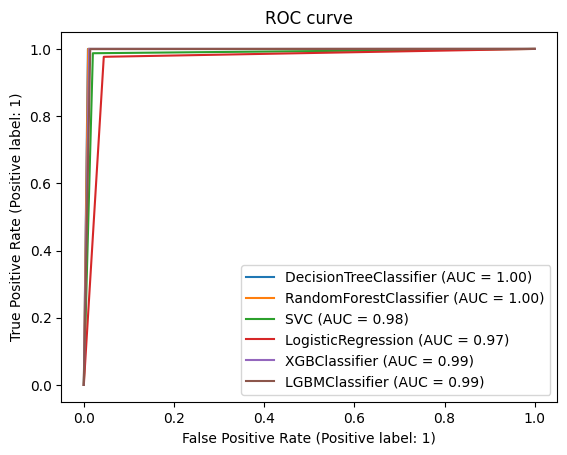

In [ ]:
# Thử training mà không cần truyền tham số vào
nor_train_models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(solver='liblinear'),
    XGBClassifier(random_state=42),
    LGBMClassifier( random_state=42)
]

def training_model(models, X_train, X_test, y_train, y_test, show_acc_chart=False):
    frame_res = []

    fig, ax = plt.subplots()

    for model in models:
        mod_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        frame_res.append((mod_name, acc_score))

        if show_acc_chart:
            display = RocCurveDisplay.from_predictions(y_test, y_pred, ax=ax, name=mod_name)

    _ = ax.set_title("ROC curve")

    cv_df = pd.DataFrame(frame_res, columns=['model_name','accuracy_score'])
    return cv_df

training_model(nor_train_models, X_train, X_test, y_train, y_test, show_acc_chart=True)

# Test cross-validation

In [ ]:

log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

lr_score = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)
lr_score.mean(), lr_score.std(),lr_score

(0.9646758621161791,
 0.004883158460698613,
 array([0.9615785 , 0.9710988 , 0.96883324, 0.96433273, 0.95753605]))

In [ ]:
dt_score = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)
dt_score.mean(), dt_score.std()

(0.9869761789453657, 0.00596368998771903)

# Baseline model comparion by cross-validation

In [ ]:
seed = 42

models = [

          #SVC(random_state=seed),
          #KNeighborsClassifier(metric='minkowski', p=2),
          LogisticRegression(solver='liblinear', max_iter=1000),
          DecisionTreeClassifier(random_state=seed),
          RandomForestClassifier(random_state=seed),
          #GradientBoostingClassifier(),
          #AdaBoostClassifier(),
          #ExtraTreesClassifier(),
          LGBMClassifier(),
          XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
          ]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__ # lấy ra tên của model, có __class__ là do mỗi model đc xem như 1 class
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold) # tính đô chính xác của mỗi model
        for fold_idx, score in enumerate(scores): # enumerate() dùng để đánh số đếm từng giá trị trong mảng. VD: [A,B,C,D] -> [(0,A),(1,B),(2,C),(3,D)]
            entries.append((model_name, fold_idx, score)) # ghép từng cái lại thành 1 metric

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    return cv_df

generate_baseline_results(models, X,y, metrics='accuracy', cv=5)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,model_name,fold_id,accuracy_score
0,LogisticRegression,0,0.965589
1,LogisticRegression,1,0.965129
2,LogisticRegression,2,0.964731
3,LogisticRegression,3,0.965037
4,LogisticRegression,4,0.965833
5,DecisionTreeClassifier,0,0.995255
6,DecisionTreeClassifier,1,0.995438
7,DecisionTreeClassifier,2,0.995591
8,DecisionTreeClassifier,3,0.995959
9,DecisionTreeClassifier,4,0.996020


# Hypertuning data

In [ ]:
from sklearn.model_selection import GridSearchCV

model_params = {
    # 'svm': {
    #     'model': SVC(gamma='auto'),
    #     'params':{
    #         'C': [1,10,20],
    #         'kernel':['rbf','linear']
    #     }
    # },
    'Logistic Regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C':[1,5,10],
            'max_iter':[1,10,100,1000]
        }
    },
    'Decision Tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth':[5,8,10]
        }
    },
    'Random Forest':{
        'model':RandomForestClassifier(),
        'params':{
            'max_depth':[5,8,10]
        }
    },
    'XGBoots':{
        'model': XGBClassifier(),
        'params':{
            'n_estimators':[1,10,100,1000]
        }
    },
    'LGB':{
        'model': LGBMClassifier(),
        'params':{
            'n_estimators':[1,10,100,1000]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
results_train = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
results_train

,model,best_score,best_params
0,Logistic Regression,0.964590,"{'C': 10, 'max_iter': 10}"
1,Decision Tree,0.991287,{'max_depth': 10}
2,Random Forest,0.988446,{'max_depth': 10}
3,XGBoots,0.994581,{'n_estimators': 1000}
4,LGB,0.994850,{'n_estimators': 1000}


-Hyperparameter 'SVC'(chưa kể những thuật toán khác) chạy rất lâu. Chạy 1 tiến trình SVC mất khoản 8p.
-'Hyperparameter' truyền vào có:
*   gamma(1gt)
*   C(3gt)
*   kernel(2gt)
*   5 fold

Vậy có 1x3x2x5=30 tiến trình, 1 tiến trình mất 8p => 30x8=240p(4 tiếng)

